In [1]:
#import libraries required for analysis
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

from matplotlib.dates import DateFormatter
from ebmdatalab import bq
from ebmdatalab import charts
from ebmdatalab import maps
import matplotlib.gridspec as gridspec

In [2]:
sql = """
SELECT
month,
bnf_code,
items,
actual_cost,
quantity

FROM hscic.prescribing_2019_05

WHERE (bnf_code LIKE "0402030K0AAACAC" OR bnf_code LIKE "0402030K0BBAAAC")

GROUP BY
month,
bnf_code,
items,
actual_cost,
quantity

ORDER BY
month


"""

df_lithium_test = bq.cached_read(sql, csv_path = 'lithium_test.csv')

In [3]:
df_lithium_test.head(10)

,month,bnf_code,items,actual_cost,quantity
0,2019-05-01 00:00:00+00:00,0402030K0AAACAC,2,124.64631,154
1,2019-05-01 00:00:00+00:00,0402030K0AAACAC,3,34.27034,42
2,2019-05-01 00:00:00+00:00,0402030K0AAACAC,5,100.74555,124
3,2019-05-01 00:00:00+00:00,0402030K0AAACAC,1,290.96787,360
4,2019-05-01 00:00:00+00:00,0402030K0AAACAC,5,186.38633,230
5,2019-05-01 00:00:00+00:00,0402030K0AAACAC,5,44.99825,55
6,2019-05-01 00:00:00+00:00,0402030K0AAACAC,5,108.01694,133
7,2019-05-01 00:00:00+00:00,0402030K0AAACAC,3,278.26575,344
8,2019-05-01 00:00:00+00:00,0402030K0AAACAC,1,194.01604,240
9,2019-05-01 00:00:00+00:00,0402030K0AAACAC,2,194.12844,240


In [4]:
df_lithium_test.nunique()

month            1
bnf_code         2
items            9
actual_cost    109
quantity        55
dtype: int64

In [5]:
df1 = df_lithium_test[df_lithium_test['quantity']<28]

In [6]:
df1.head()

,month,bnf_code,items,actual_cost,quantity
11,2019-05-01 00:00:00+00:00,0402030K0AAACAC,4,19.83996,24
13,2019-05-01 00:00:00+00:00,0402030K0AAACAC,1,5.76792,7
14,2019-05-01 00:00:00+00:00,0402030K0AAACAC,3,10.03238,12
84,2019-05-01 00:00:00+00:00,0402030K0AAACAC,1,11.42345,14
98,2019-05-01 00:00:00+00:00,0402030K0AAACAC,4,13.37651,16


In [7]:
df1.sum()

month          2019-05-01 00:00:00+00:002019-05-01 00:00:00+0...
bnf_code       0402030K0AAACAC0402030K0AAACAC0402030K0AAACAC0...
items                                                         14
actual_cost                                              60.7662
quantity                                                      80
dtype: object

In [8]:
df_lithium_test.sum()

month          2019-05-01 00:00:00+00:002019-05-01 00:00:00+0...
bnf_code       0402030K0AAACAC0402030K0AAACAC0402030K0AAACAC0...
items                                                        327
actual_cost                                              13466.5
quantity                                                   16660
dtype: object

In [9]:
df_lithium_test["bnf_code"].unique()

array(['0402030K0AAACAC', '0402030K0BBAAAC'], dtype=object)

In [10]:
df_lithium_test['cost_per_item'] = (df_lithium_test['actual_cost']/df_lithium_test['items'])
df_lithium_test.head()

,month,bnf_code,items,actual_cost,quantity,cost_per_item
0,2019-05-01 00:00:00+00:00,0402030K0AAACAC,2,124.64631,154,62.323155
1,2019-05-01 00:00:00+00:00,0402030K0AAACAC,3,34.27034,42,11.423447
2,2019-05-01 00:00:00+00:00,0402030K0AAACAC,5,100.74555,124,20.149110
3,2019-05-01 00:00:00+00:00,0402030K0AAACAC,1,290.96787,360,290.967870
4,2019-05-01 00:00:00+00:00,0402030K0AAACAC,5,186.38633,230,37.277266


In [11]:
df_brandedlist = df_lithium_test.groupby('bnf_code')

In [12]:
df_brandedlist.head()

,month,bnf_code,items,actual_cost,quantity,cost_per_item
0,2019-05-01 00:00:00+00:00,0402030K0AAACAC,2,124.64631,154,62.323155
1,2019-05-01 00:00:00+00:00,0402030K0AAACAC,3,34.27034,42,11.423447
2,2019-05-01 00:00:00+00:00,0402030K0AAACAC,5,100.74555,124,20.149110
3,2019-05-01 00:00:00+00:00,0402030K0AAACAC,1,290.96787,360,290.967870
4,2019-05-01 00:00:00+00:00,0402030K0AAACAC,5,186.38633,230,37.277266
19,2019-05-01 00:00:00+00:00,0402030K0BBAAAC,1,22.73449,28,22.734490
28,2019-05-01 00:00:00+00:00,0402030K0BBAAAC,1,25.16757,56,25.167570
39,2019-05-01 00:00:00+00:00,0402030K0BBAAAC,1,80.80558,100,80.805580
105,2019-05-01 00:00:00+00:00,0402030K0BBAAAC,1,0.32599,7,0.325990


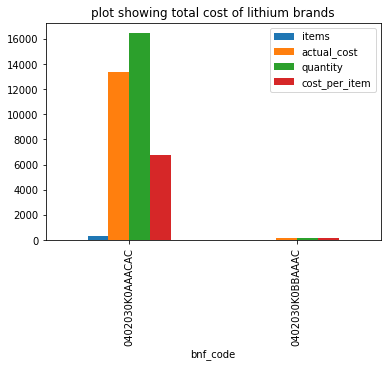

In [13]:
plot1 = df_brandedlist.sum().plot(kind='bar', title='plot showing total cost of lithium brands')

In [14]:
plot2 = df_brandedlist.plot(['month'], ['cost_per_item'])

ValueError: x must be a label or position

In [ ]:
sql2 = """
SELECT
month,
bnf_code,
items,
actual_cost,
quantity

FROM hscic.normalised_prescribing_standard

WHERE (bnf_code LIKE "0402030K0%" OR bnf_code LIKE "0402030P0%")

GROUP BY
month,
bnf_code,
items,
actual_cost,
quantity

ORDER BY
month


"""

df_lithium_costs = bq.cached_read(sql2, csv_path="lithium_costs.csv")

In [ ]:
df_lithium_costs.head(-10)

In [ ]:
df_lithium_costs['cost_per_item'] = (df_lithium_costs['actual_cost']/df_lithium_costs['items'])
df_lithium_costs.head()

In [ ]:
df_lithium_costs["bnf_code"].unique() #to show what brands are included in this data

In [ ]:
df_lithium_costs.nunique()

In [ ]:
df_group_by_month = df_lithium_costs.groupby(['month','bnf_code'])
df_group_by_month.head()

In [ ]:
plot2 = df_group_by_month['cost_per_item'].sum().plot(kind='line', title = "plot of lithium branded costs over time")

In [ ]:
plot3 = df_group_by_month.sum().plot(['month'], ['actual_cost'], kind = 'line')